# 01__DESeq2

in this notebook, i run the raw counts for the differentiated/undifferentiated populations through DESeq2 to get a l2fc for each sgRNA in the library

In [1]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

In [2]:
# BiocManager::install("DESeq2")

In [3]:
suppressMessages(library("DESeq2"))

## 1. import data

In [4]:
cts <- read.csv("../../../data/02__screen/00__counts/Biol_Reps.sgRNA_counts.txt", sep="\t", row.names="sgRNA")
cts <- as.matrix(cts)
head(cts)

,DZ_Rep1,DZ_Rep2,Pos_Rep1,Pos_Rep2,Neg_Rep1,Neg_Rep2
TTATCTGCATACTTATACAG,728,637,921,420,0,524
TATGCTTTATCCACTCCGAC,1016,1206,1754,733,660,347
TGAAAGCATAGGATATGGCA,1859,2038,2540,1065,1730,1004
AATGGTAAGTTGCTGCTCAG,961,925,2061,758,1471,1253
TAAGCATGCGTGGTATCAAG,2257,1383,2558,921,1250,0
GCTGGGAGGCGCTGGACGGC,1075,1102,1466,847,916,664


In [5]:
cols <- read.csv("../../../data/02__screen/01__normalized_counts/col_info.txt", sep="\t", row.names="column")
cols$condition <- as.factor(cols$condition)
cols$rep <- as.factor(cols$rep)
cols$time <- as.factor(cols$time)
head(cols)

,condition,rep,time
DZ_Rep1,DZ,Rep1,initial
DZ_Rep2,DZ,Rep2,initial
Pos_Rep1,Pos,Rep1,late
Pos_Rep2,Pos,Rep2,late
Neg_Rep1,Neg,Rep1,late
Neg_Rep2,Neg,Rep2,late


In [6]:
fc_cts <- cts[, c(5,6,3,4)]
head(fc_cts)

,Neg_Rep1,Neg_Rep2,Pos_Rep1,Pos_Rep2
TTATCTGCATACTTATACAG,0,524,921,420
TATGCTTTATCCACTCCGAC,660,347,1754,733
TGAAAGCATAGGATATGGCA,1730,1004,2540,1065
AATGGTAAGTTGCTGCTCAG,1471,1253,2061,758
TAAGCATGCGTGGTATCAAG,1250,0,2558,921
GCTGGGAGGCGCTGGACGGC,916,664,1466,847


In [7]:
fc_cts_rep1 <- cts[, c(5,3)]
head(fc_cts_rep1)

,Neg_Rep1,Pos_Rep1
TTATCTGCATACTTATACAG,0,921
TATGCTTTATCCACTCCGAC,660,1754
TGAAAGCATAGGATATGGCA,1730,2540
AATGGTAAGTTGCTGCTCAG,1471,2061
TAAGCATGCGTGGTATCAAG,1250,2558
GCTGGGAGGCGCTGGACGGC,916,1466


In [8]:
fc_cts_rep2 <- cts[, c(6,4)]
head(fc_cts_rep2)

,Neg_Rep2,Pos_Rep2
TTATCTGCATACTTATACAG,524,420
TATGCTTTATCCACTCCGAC,347,733
TGAAAGCATAGGATATGGCA,1004,1065
AATGGTAAGTTGCTGCTCAG,1253,758
TAAGCATGCGTGGTATCAAG,0,921
GCTGGGAGGCGCTGGACGGC,664,847


In [9]:
fc_cols <- cols[3:6, ]
fc_cols <- fc_cols[c(3,4,1,2), ]
fc_cols

,condition,rep,time
Neg_Rep1,Neg,Rep1,late
Neg_Rep2,Neg,Rep2,late
Pos_Rep1,Pos,Rep1,late
Pos_Rep2,Pos,Rep2,late


In [10]:
fc_cols_rep1 <- fc_cols[c(1,3), ]
fc_cols_rep1

,condition,rep,time
Neg_Rep1,Neg,Rep1,late
Pos_Rep1,Pos,Rep1,late


In [11]:
fc_cols_rep2 <- fc_cols[c(2,4), ]
fc_cols_rep2

,condition,rep,time
Neg_Rep2,Neg,Rep2,late
Pos_Rep2,Pos,Rep2,late


## 2. DESeq2

In [12]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = cols,
                              design = ~ condition)

In [13]:
dds <- estimateSizeFactors(dds)

In [14]:
norm_cts <- counts(dds, normalized=TRUE)
head(norm_cts)

,DZ_Rep1,DZ_Rep2,Pos_Rep1,Pos_Rep2,Neg_Rep1,Neg_Rep2
TTATCTGCATACTTATACAG,704.2718,586.4672,563.0922,561.5087,0.0000,541.6455
TATGCTTTATCCACTCCGAC,982.8848,1110.3288,1072.3819,979.9664,653.5782,358.6851
TGAAAGCATAGGATATGGCA,1798.4084,1876.3267,1552.9362,1423.8257,1713.1671,1037.8093
AATGGTAAGTTGCTGCTCAG,929.6775,851.6203,1260.0794,1013.3896,1456.6872,1295.1943
TAAGCATGCGTGGTATCAAG,2183.4361,1273.2875,1563.9413,1231.3085,1237.8375,0.0000
GCTGGGAGGCGCTGGACGGC,1039.9618,1014.5790,896.3010,1132.3760,907.0873,686.3599


In [15]:
rld <- rlog(dds)
head(assay(rld))

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.


,DZ_Rep1,DZ_Rep2,Pos_Rep1,Pos_Rep2,Neg_Rep1,Neg_Rep2
TTATCTGCATACTTATACAG,9.022278,8.940067,8.922797,8.921544,8.330748,8.906570
TATGCTTTATCCACTCCGAC,9.806630,9.893664,9.868626,9.804493,9.535898,9.200367
TGAAAGCATAGGATATGGCA,10.744781,10.787724,10.597569,10.511513,10.695839,10.205004
AATGGTAAGTTGCTGCTCAG,9.975677,9.906715,10.227389,10.045342,10.351186,10.250730
TAAGCATGCGTGGTATCAAG,10.645091,10.125553,10.320086,10.094178,10.099214,7.523307
GCTGGGAGGCGCTGGACGGC,9.949428,9.931080,9.840500,10.013170,9.849133,9.657008


In [16]:
vsd <- vst(dds, blind=FALSE)
head(assay(vsd))

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.


,DZ_Rep1,DZ_Rep2,Pos_Rep1,Pos_Rep2,Neg_Rep1,Neg_Rep2
TTATCTGCATACTTATACAG,10.34290,10.27091,10.25567,10.25462,8.296486,10.241326
TATGCTTTATCCACTCCGAC,10.49729,10.56657,10.54584,10.49571,10.312765,10.098012
TGAAAGCATAGGATATGGCA,10.95169,10.99389,10.81489,10.74169,10.904794,10.527044
AATGGTAAGTTGCTGCTCAG,10.46849,10.42597,10.64941,10.51380,10.760324,10.669081
TAAGCATGCGTGGTATCAAG,11.15370,10.65680,10.82111,10.63336,10.636999,8.296486
GCTGGGAGGCGCTGGACGGC,10.52821,10.51445,10.45037,10.57865,10.456237,10.332377


In [17]:
dds <- estimateSizeFactors(dds)

In [18]:
dds <- DESeqDataSetFromMatrix(countData = fc_cts,
                              colData = fc_cols,
                              design = ~ condition)

factor levels were dropped which had no samples


In [19]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
fitting model and testing


In [20]:
res <- results(dds)
head(res)

log2 fold change (MLE): condition Pos vs Neg 
Wald test p-value: condition Pos vs Neg 
DataFrame with 6 rows and 6 columns
                             baseMean    log2FoldChange             lfcSE
                            <numeric>         <numeric>         <numeric>
TTATCTGCATACTTATACAG 412.256020283252  1.04185097086873  2.83961662764972
TATGCTTTATCCACTCCGAC 758.030832684092  1.00900393152098 0.688289802287602
TGAAAGCATAGGATATGGCA 1418.35726476102 0.103126354387972 0.480259732350658
AATGGTAAGTTGCTGCTCAG  1245.1737483947  -0.2857710617125 0.392330087303212
TAAGCATGCGTGGTATCAAG 997.275095587964  1.16528235659288  2.57884012864359
GCTGGGAGGCGCTGGACGGC 896.653787467409   0.3368684724605 0.530112660108345
                                   stat            pvalue              padj
                              <numeric>         <numeric>         <numeric>
TTATCTGCATACTTATACAG  0.366898461124679  0.71369475937438 0.987449372205075
TATGCTTTATCCACTCCGAC   1.46595798480154 0.142659733460345

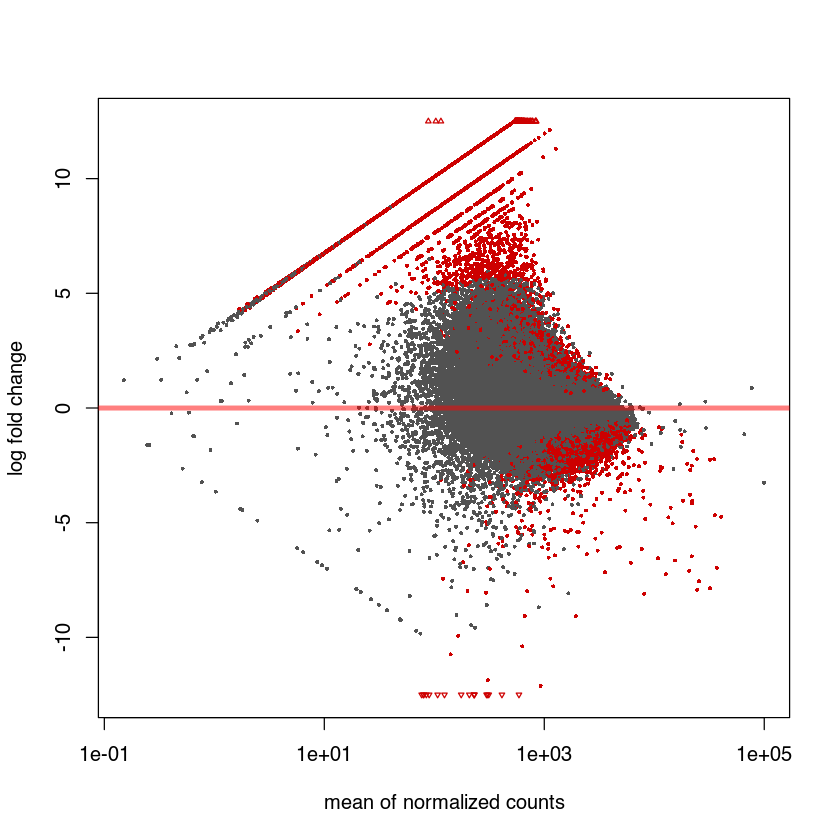

In [21]:
plotMA(res)

## 3. write results

In [22]:
write.table(res, file = "../../../data/02__screen/01__normalized_counts/l2fcs.DESeq2.txt", 
            sep = "\t", quote = FALSE)